Edie Miglio

email: edie.miglio@polimi.it


# Introduction to Python

## Project 8: solve the 1D Laplacian by FDM

**Skills.**
* Numpy
* numpy arrays (vectors and matrices)
* Intro to Scipy


**Problem.** We want to solve, using Finite Differences, the following problem:

$$
-u^{\prime\prime} = g(x), \quad \textrm{ in } \Omega=(0,2\pi),\\
u(0)=u(2\pi)=0.
$$

with $g(x) = sin(x)$.  

The solution is simply $u(x) = sin(x)$.

We'll use a grid of $N$ points with $x_0=0, x_{N-1}=2\pi$ and $\Delta x=\frac{2\pi}{N-1}$.

In each point of the grid the equation can be discretized as:

$$-\frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta x^2} = g_i,$$

where $g_i=g(x_i)$.

We keep the boundary points fixed, so we only need to solve for the $N-2$ interior points.  Near the boundaries, our difference is:
$$-u_2 + 2 u_1 = \Delta x^2 g_1$$

and

$$2u_{N-1} - u_{N-2} = \Delta x^2 g_{N-1}$$.

We can write the system of equations for solving for the $N-2$ interior points as:

\begin{equation}
A = \left (
\begin{array}{ccccccc}
2 &  -1 &    &        &         &           &          \newline
-1  & 2 &  -1 &        &         &           &          \newline
   &  -1 & 2 & -1      &         &           &          \newline
   &         & \ddots & \ddots & \ddots  &           &          \newline
   &         &        & \ddots & \ddots  & \ddots  &          \newline
   &         &        &        & -1       & 2 & -1  \newline
   &         &        &        &         & -1  & 2 \newline
\end{array}
\right )
\end{equation}

\begin{equation}
{\bf u} = \left (
\begin{array}{c}
u_\mathrm{1} \\\
u_\mathrm{2} \\\
u_\mathrm{3} \\\
\vdots \\\
\vdots \\\
u_\mathrm{N-2} \\\
u_\mathrm{N-1} \\\
\end{array}
\right ), \quad
{\bf g} = \Delta x^2 \left (
\begin{array}{c}
g_\mathrm{1} \\\
g_\mathrm{2} \\\
g_\mathrm{3} \\\
\vdots \\\
\vdots \\\
g_\mathrm{N-2} \\\
g_\mathrm{N-1}\\\
\end{array}
\right )
\end{equation}

Then we just solve $A {\bf u} = {\bf g}$

In [ ]:
import numpy as np
d=np.array([2, 2, 2])
l=np.array([-1,-1])
u=l
A = np.diag(d)+np.diag(u,1)+np.diag(l,-1)

In [ ]:
A

In [ ]:
v=np.array([1,2,3])

In [ ]:
np.dot(A,v)

In [ ]:
A@A

In [ ]:
import numpy as np
d=np.array([2, 2, 2])
l=np.array([-1,-1])
u=l
A=np.diag(d)+np.diag(l,-1)+np.diag(u,1)
v=np.array([1,2,3])
print(A)
np.dot(v,v)
L, _ = np.linalg.eig(A)
L

In [ ]:
help(np.linspace)

In [ ]:
np.ones([5,2])

In [ ]:
help(np.linalg.solve)

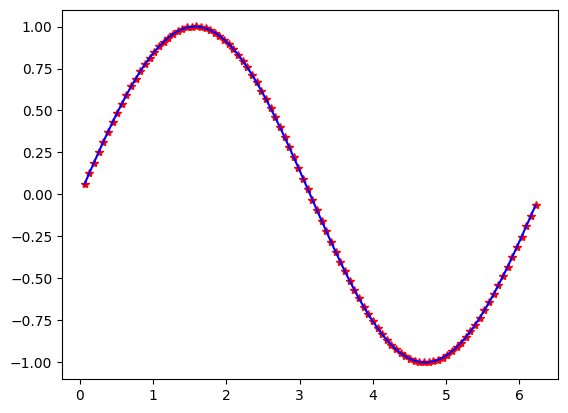

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Generation of the grid (including endpoints)
N = 100 # Number of points
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
dx = x[1]-x[0]

# Source term
g = np.sin(x)

# Vectors for building the matrix
e = np.ones(N-2)
d =2*e
e1 = -1*np.ones(N-3)
u=e1
l=e1

# Construction of the matrix
A=np.diag(d)+np.diag(u,1)+np.diag(l,-1)

# Construction of the RHS
g = dx**2*g[1:N-1]

# Solution of the linear system (Au=g)
u=np.linalg.solve(A,g)

# Computation of the true solution
u_ex = np.sin(x[1:N-1])

# Plot the numerical solution (red stars) against the true solution (blue)
plt.plot(x[1:N-1], u, 'r*', x[1:N-1], u_ex, 'b')


**Exercise** Build a 10 by 10 matrix where you all 5 on the main diagonal, you have 4 on the first upper diagonal, 3 on the second upper diagonal, 2 on the first lower diagonal and -1 on the second lower diagonal.

In [34]:
A = np.diag(5*np.ones(10))+ np.diag(4*np.ones(9),1)+np.diag(3*np.ones(8),2)+np.diag(2*np.ones(9),-1)+np.diag(-1*np.ones(8),-2)

In [35]:
A

array([[ 5.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  5.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2.,  5.,  4.,  3.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  5.,  4.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2.,  5.,  4.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2.,  5.,  4.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2.,  5.,  4.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2.,  5.,  4.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  5.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  5.]])

## Project 9: 3D Function plot and minimization

**Skills.**


*   Plot 3D functions
*   Scipy module
*   Minimization



**Problem.** Consider the Himmelblau's function given by:
$$
f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2.
$$
It has one local maximum at $(-0.270845,-0.923039)$ where $f(x,y)=181.617$ and four identical local minima:

* $f(3.0,2.0)=0.0$,
* $f(-2.805118,3.131312)=0.0$,
* $f(-3.779310,-3.283186)=0.0$,
* $f(3.584428,-1.848126)=0.0$.

Plot the function for $x\in[-5,5]$ and $y\in[-5,5]$.

In [39]:
help(np.meshgrid)

Help on _ArrayFunctionDispatcher in module numpy:

meshgrid(*xi, copy=True, sparse=False, indexing='xy')
    Return a list of coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True the shape of the returned coordinate array for dimension *i*
        is reduced from ``(N1, ..., Ni, ... Nn)`` to
        ``(1, ..., 1, Ni, 1, ..., 1)``.  These sparse coordinate grids are
        intended to be use with :ref:`basics.b

In [40]:
import numpy as np
x=np.arange(0,1.2,0.2)
y=x
[X,Y]=np.meshgrid(x,y)

In [41]:
Y

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [1. , 1. , 1. , 1. , 1. , 1. ]])

In [42]:
X

array([[0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ]])

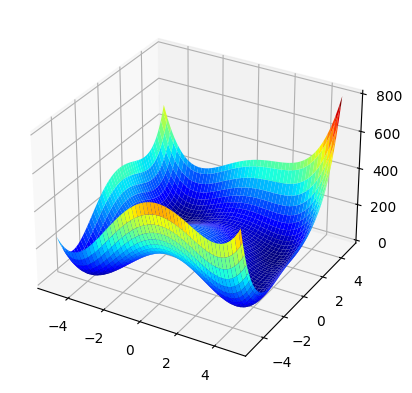

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Himmelblau function
def Himmelblau(x):
	return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2

# Create the vectors for
xaxis = np.arange(-5, 5, 0.1)
yaxis = np.arange(-5, 5, 0.1)
# Create a mesh from the axis
X, Y = np.meshgrid(xaxis, yaxis)
# Compute Z
Z = Himmelblau([X,Y])
# Create a surface plot
fig = plt.figure()
axis=plt.subplot(projection='3d')
axis.plot_surface(X,Y,Z, cmap='jet')
# show the plot
plt.show()
fig.savefig('pippo.png')

In [51]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, data=None, **kwargs)
    Plot contour lines.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == N`` is the number of columns in *Z* and
        ``len(Y) == M`` is the number of rows in *Z*.
    
        *X* and *Y* must both be ordered monotonically.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(N)``, ``Y = range(M)``.
    
    Z : (M, N) array-like
        The height values over which t

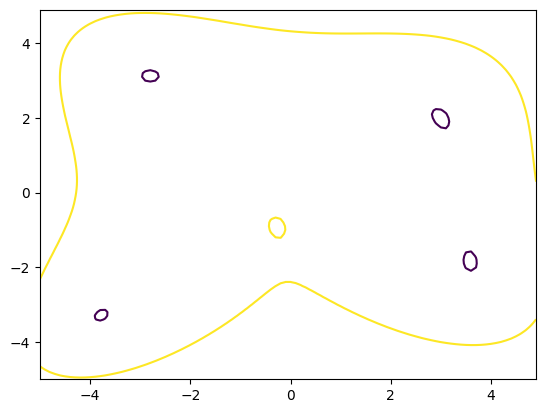

In [53]:
fig = plt.figure()
axis=plt.subplot()
axis.contour(X,Y,Z,[1,181])
# show the plot
plt.show()

In [55]:
#from scipy import optimize
import scipy.optimize as so

res = so.minimize(Himmelblau, x0=[3, 3])
res.x

array([2.99999999, 1.99999999])

## Project 10: Visualize COVID data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
type(covid)

pandas.core.frame.DataFrame

In [57]:
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
#covid.head()
#covid.shape
#covid.dtypes
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [62]:
#covid.tail()
#covid.shape
covid.dtypes

,0
Date,object
Country,object
Confirmed,int64
Recovered,int64
Deaths,int64


In [63]:
covid.dtypes

,0
Date,object
Country,object
Confirmed,int64
Recovered,int64
Deaths,int64


In [78]:
# Date is object type, need to conver it to datetime format
import matplotlib.dates as mdates
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',
                     parse_dates = ['Date'])
covid1.dtypes
# covid1.head()

,0
Date,datetime64[ns]
Country,object
Confirmed,int64
Recovered,int64
Deaths,int64


In [79]:
# Sum of total cases -> creating a new column
covid1['Total Confirmed'] = covid1[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
covid1.tail()

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
161563,2022-04-12,Zimbabwe,247094,0,5460,252554
161564,2022-04-13,Zimbabwe,247160,0,5460,252620
161565,2022-04-14,Zimbabwe,247208,0,5462,252670
161566,2022-04-15,Zimbabwe,247237,0,5462,252699
161567,2022-04-16,Zimbabwe,247237,0,5462,252699


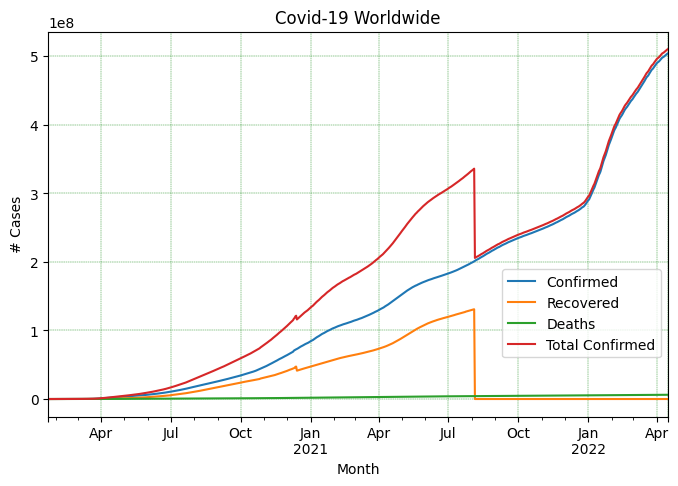

In [71]:
# Plotting for wordlwide cases
worldwide = covid1.groupby(['Date']).sum()
c = worldwide.plot(figsize = (8, 5))
c.set_xlabel('Month')
c.set_ylabel('# Cases')
c.title.set_text('Covid-19 Worldwide')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [68]:
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 2020-01-22 to 2022-04-16
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          816 non-null    object
 1   Confirmed        816 non-null    int64 
 2   Recovered        816 non-null    int64 
 3   Deaths           816 non-null    int64 
 4   Total Confirmed  816 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 38.2+ KB


In [69]:
worldwide.head()

,Country,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,,
2020-01-22,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,557,30,17,604
2020-01-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,657,32,18,707
2020-01-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,944,39,26,1009
2020-01-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,1437,42,42,1521
2020-01-26,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,2120,56,56,2232


In [80]:
Italy = covid1[covid1['Country'] =='Italy'].groupby(['Date']).sum()
Italy.tail()

,Country,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,,
2022-04-12,Italy,15404809,0,161032,15565841
2022-04-13,Italy,15467395,0,161187,15628582
2022-04-14,Italy,15533012,0,161336,15694348
2022-04-15,Italy,15595302,0,161469,15756771
2022-04-16,Italy,15659835,0,161602,15821437


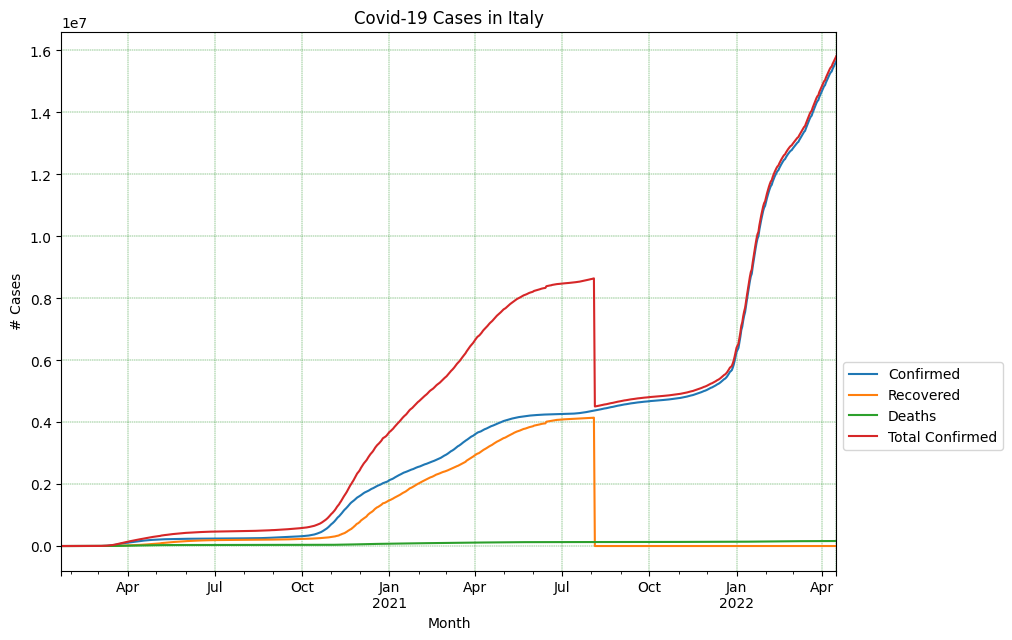

In [81]:
I = Italy.plot(figsize = (10, 7))
I.set_xlabel('Month')
I.set_ylabel('# Cases')
I.title.set_text('Covid-19 Cases in Italy')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [82]:
day = '2022-04-16'
last_covid=covid1[covid1['Date']==day ]
top_10=last_covid.sort_values(['Confirmed'],ascending=False)[:10]

In [83]:
last_covid

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
815,2022-04-16,Afghanistan,178387,0,7676,186063
1631,2022-04-16,Albania,274462,0,3496,277958
2447,2022-04-16,Algeria,265739,0,6874,272613
3263,2022-04-16,Andorra,40709,0,153,40862
4079,2022-04-16,Angola,99194,0,1900,101094
...,...,...,...,...,...,...
158303,2022-04-16,West Bank and Gaza,656617,0,5656,662273
159119,2022-04-16,Winter Olympics 2022,535,0,0,535
159935,2022-04-16,Yemen,11817,0,2148,13965
160751,2022-04-16,Zambia,318467,0,3973,322440


In [84]:
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
150143,2022-04-16,US,80625120,0,988609,81613729
66095,2022-04-16,India,43042097,0,521751,43563848
20399,2022-04-16,Brazil,30250077,0,662185,30912262
52223,2022-04-16,France,27874269,0,145159,28019428
55487,2022-04-16,Germany,23416663,0,132942,23549605
153407,2022-04-16,United Kingdom,21916961,0,172014,22088975
119135,2022-04-16,Russia,17801103,0,365774,18166877
76703,2022-04-16,"Korea, South",16305752,0,21092,16326844
70991,2022-04-16,Italy,15659835,0,161602,15821437
149327,2022-04-16,Turkey,14991669,0,98551,15090220


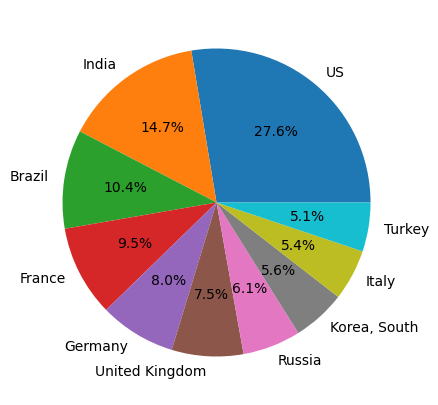

In [85]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%');